In [1]:
SensorNum=1 # Sensor number
WindowWidth=[128,256,512,1024,2048,4096] # Window Width
OverlapArray=[16,32,64,128,256] # sliding window
#width=1000 # graph width 
#EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
encoding_dim=16
Axis='AccX,AccY,AccZ' # Axis
PathAxis='AccXYZ'

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData"
DATE_PATH="/2016-08-15/"
TITLE_PATH="Sparse/"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD, Adadelta, Adagrad, Adam, Adamax, RMSprop, Nadam
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras import regularizers

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
# define rawdata directory
if not os.path.exists(WORKSPACE_PATH+"/raw/"):
    os.makedirs(WORKSPACE_PATH+"/raw/")
RawDataPath=WORKSPACE_PATH+"/raw/"

# define restoring windowdata directory
if not os.path.exists(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'

# define restoring netowrk model picture's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'

# define restoring graph data's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/')
GlaphDataPath=WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'

# define restoring model paarmeter directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/')
StudyDataPath=WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成**

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =15914
SourceData's aborting data = 6
window shape is (15914, 128, 3)
(15914, 128, 3)
hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/100
2s - loss: -5.6917e+02 - val_loss: -6.0980e+02
Epoch 2/100
2s - loss: -6.2553e+02 - val_loss: -6.4727e+02
Epoch 3/100
2s - loss: -6.5752e+02 - val_loss: -6.6764e+02
Epoch 4/100
1s - loss: -6.7291e+02 - val_loss: -6.6736e+02
Epoch 5/100
2s - loss: -5.9285e+02 - val_loss: -6.3985e+02
Epoch 6/100
3s - loss: -6.5270e+02 - val_loss: -6.6079e+02
Epoch 7/100
3s - loss: -6.6388e+02 - val_loss: -6.6544e+02
Epoch 8/100
3s - loss: -6.7149e+02 - val_loss: -6.7545e+02
Epoch 9/100
3s - loss: -6.7606e+02 - val_loss: -6.7783e+02
Epoch 10/100
3s - loss: -6.4577e+02 - val_loss: -5.2998e+02
Epoch 11/100
3s - loss: -6.2323e+02 - val_loss: -6.5479e+02
Epoch 12/100
3s - loss: -6.7135e+02 - val_loss: -6.7585e+02
Epoch 13/100
3s - loss: -6.798

/home/takeyama/.pyenv/versions/2.7.11/envs/takeyama/lib/python2.7/site-packages/keras/backend/theano_backend.py:558: UserWarning: theano.function was asked to create a function computing outputs given certain inputs, but the provided input variable at index 1 is not part of the computational graph needed to compute the outputs: keras_learning_phase.
To make this warning into an error, you can pass the parameter on_unused_input='raise' to theano.function. To disable it completely, use on_unused_input='ignore'.
  **kwargs)


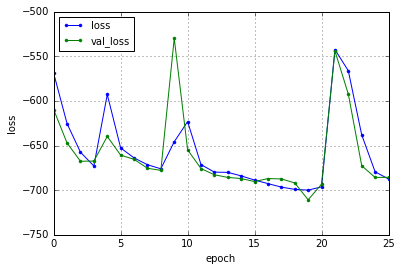

hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/100
3s - loss: -1.2657e+03 - val_loss: -1.3620e+03
Epoch 2/100
3s - loss: -1.4171e+03 - val_loss: -1.4489e+03
Epoch 3/100
2s - loss: -1.4616e+03 - val_loss: -1.4803e+03
Epoch 4/100
2s - loss: -1.4879e+03 - val_loss: -1.5019e+03
Epoch 5/100
3s - loss: -1.5020e+03 - val_loss: -1.5028e+03
Epoch 6/100
3s - loss: -1.5101e+03 - val_loss: -1.5240e+03
Epoch 7/100
3s - loss: -1.5280e+03 - val_loss: -1.5466e+03
Epoch 8/100
3s - loss: -1.5543e+03 - val_loss: -1.5559e+03
Epoch 9/100
3s - loss: -1.5616e+03 - val_loss: -1.5621e+03
Epoch 10/100
3s - loss: -1.5629e+03 - val_loss: -1.5645e+03
Epoch 11/100
3s - loss: -1.3408e+03 - val_loss: -1.4458e+03
Epoch 12/100
3s - loss: -1.4851e+03 - val_loss: -1.5031e+03
Epoch 13/100
3s - loss: -1.5036e+03 - val_loss: -1.5042e+03
Epoch 14/100
3s - loss: -1.5042e+03 - val_loss: -1.5016e+03
Epoch 15/100
3s - loss: -1.5045e+03 - val_loss: -1.5047e+03
Epoch 16/100
4s - loss: -1.5022e+03 - val_l

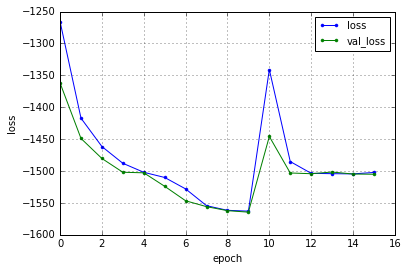

hiden node = 16
Train on 15914 samples, validate on 15914 samples
Epoch 1/100
3s - loss: -2.1099e+01 - val_loss: -1.7095e+01
Epoch 2/100
3s - loss: -3.1052e+01 - val_loss: -2.7480e+01
Epoch 3/100
3s - loss: -3.9598e+01 - val_loss: -2.5466e+01
Epoch 4/100
3s - loss: -4.5498e+01 - val_loss: -2.4115e+01
Epoch 5/100
3s - loss: -4.6129e+01 - val_loss: -2.4821e+01
Epoch 6/100
3s - loss: -4.7067e+01 - val_loss: -2.5769e+01
Epoch 7/100
3s - loss: -4.8954e+01 - val_loss: -2.6344e+01
Epoch 8/100
3s - loss: -5.3175e+01 - val_loss: -2.3949e+01


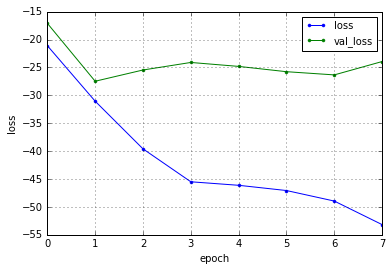

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =7953
SourceData's aborting data = 22
window shape is (7953, 256, 3)
(7953, 256, 3)
hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/100
0s - loss: -1.0428e+03 - val_loss: -1.1258e+03
Epoch 2/100
1s - loss: -1.1720e+03 - val_loss: -1.1938e+03
Epoch 3/100
1s - loss: -1.2330e+03 - val_loss: -1.2582e+03
Epoch 4/100
0s - loss: -1.2739e+03 - val_loss: -1.2852e+03
Epoch 5/100
0s - loss: -1.2889e+03 - val_loss: -1.2971e+03
Epoch 6/100
0s - loss: -1.2947e+03 - val_loss: -1.3007e+03
Epoch 7/100
0s - loss: -1.2045e+03 - val_loss: -7.8626e+02
Epoch 8/100
0s - loss: -8.9412e+02 - val_loss: -9.5168e+02
Epoch 9/100
0s - loss: -9.7175e+02 - val_loss: -1.0064e+03
Epoch 10/100
0s - loss: -1.0551e+03 - val_loss: -1.0829e+03
Epoch 11/100
0s - loss: -1.1143e+03 - val_loss: -1.1449e+03
Epoch 12/100
0s - loss: -1.1648e+03 - val_loss: -1.1889e+03


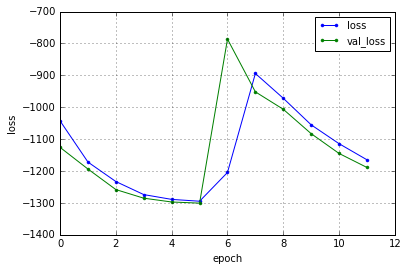

hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/100
0s - loss: -2.4033e+03 - val_loss: -2.5662e+03
Epoch 2/100
0s - loss: -2.6443e+03 - val_loss: -2.7173e+03
Epoch 3/100
1s - loss: -2.7689e+03 - val_loss: -2.8242e+03
Epoch 4/100
1s - loss: -2.8463e+03 - val_loss: -2.8531e+03
Epoch 5/100
1s - loss: -2.8630e+03 - val_loss: -2.8820e+03
Epoch 6/100
1s - loss: -2.8978e+03 - val_loss: -2.9176e+03
Epoch 7/100
1s - loss: -2.9292e+03 - val_loss: -2.9389e+03
Epoch 8/100
0s - loss: -2.9522e+03 - val_loss: -2.9578e+03
Epoch 9/100
1s - loss: -2.9622e+03 - val_loss: -2.9718e+03
Epoch 10/100
0s - loss: -2.9913e+03 - val_loss: -2.9988e+03
Epoch 11/100
1s - loss: -3.0001e+03 - val_loss: -3.0081e+03
Epoch 12/100
0s - loss: -3.0167e+03 - val_loss: -3.0197e+03
Epoch 13/100
0s - loss: -3.0238e+03 - val_loss: -3.0269e+03
Epoch 14/100
0s - loss: -3.0272e+03 - val_loss: -3.0292e+03
Epoch 15/100
0s - loss: -3.0416e+03 - val_loss: -3.0485e+03
Epoch 16/100
0s - loss: -3.0551e+03 - val_los

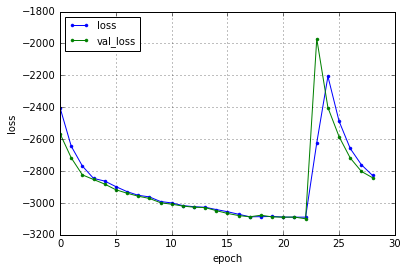

hiden node = 16
Train on 7953 samples, validate on 7953 samples
Epoch 1/100
0s - loss: -1.8069e+01 - val_loss: -8.1221e+01
Epoch 2/100
0s - loss: -3.7106e+01 - val_loss: -3.4894e+01
Epoch 3/100
0s - loss: -4.6628e+01 - val_loss: -3.0961e+01
Epoch 4/100
0s - loss: -5.8170e+01 - val_loss: -1.2552e+02
Epoch 5/100
0s - loss: -5.9969e+01 - val_loss: -4.5012e+01
Epoch 6/100
1s - loss: -6.2403e+01 - val_loss: -2.2073e+01
Epoch 7/100
0s - loss: -6.4405e+01 - val_loss: -1.2085e+02
Epoch 8/100
0s - loss: -7.1853e+01 - val_loss: -1.4419e+02
Epoch 9/100
0s - loss: -6.2809e+01 - val_loss: -1.4097e+02
Epoch 10/100
0s - loss: -7.6507e+01 - val_loss: -4.7902e+01
Epoch 11/100
0s - loss: -8.7977e+01 - val_loss: -5.5290e+01
Epoch 12/100
0s - loss: -8.2650e+01 - val_loss: -1.4103e+02
Epoch 13/100
0s - loss: -8.3847e+01 - val_loss: -1.0393e+02
Epoch 14/100
0s - loss: -9.0652e+01 - val_loss: -5.8663e+01


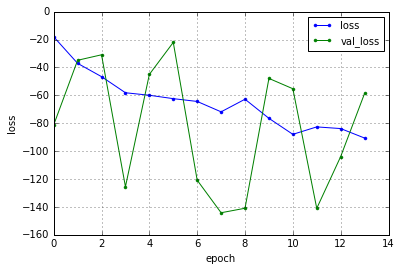

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =3973
SourceData's aborting data = 22
window shape is (3973, 512, 3)
(3973, 512, 3)
hiden node = 16
Train on 3973 samples, validate on 3973 samples
Epoch 1/100
0s - loss: -1.9519e+03 - val_loss: -2.0954e+03
Epoch 2/100
0s - loss: -2.1503e+03 - val_loss: -2.1816e+03
Epoch 3/100
0s - loss: -2.2115e+03 - val_loss: -2.2385e+03
Epoch 4/100
0s - loss: -2.2642e+03 - val_loss: -2.2810e+03
Epoch 5/100
0s - loss: -2.3034e+03 - val_loss: -2.3242e+03
Epoch 6/100
0s - loss: -2.3418e+03 - val_loss: -2.3520e+03
Epoch 7/100
0s - loss: -2.3629e+03 - val_loss: -2.3691e+03
Epoch 8/100
0s - loss: -2.3751e+03 - val_loss: -2.3883e+03
Epoch 9/100
0s - loss: -2.4013e+03 - val_loss: -2.4089e+03
Epoch 10/100
0s - loss: -2.4172e+03 - val_loss: -2.4210e+03
Epoch 11/100
0s - loss: -2.4249e+03 - val_loss: -2.4324e+03
Epoch 12/100
0s - loss: -2.4395e+03 - val_loss: -2.4476e+03
Epoch 13/100
0s - loss: -2.4568e+0

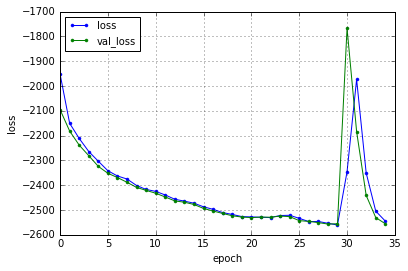

hiden node = 16
Train on 3973 samples, validate on 3973 samples
Epoch 1/100
0s - loss: -4.3287e+03 - val_loss: -4.5878e+03
Epoch 2/100
0s - loss: -4.7696e+03 - val_loss: -4.8974e+03
Epoch 3/100
0s - loss: -4.9804e+03 - val_loss: -5.0594e+03
Epoch 4/100
0s - loss: -5.1328e+03 - val_loss: -5.1866e+03
Epoch 5/100
0s - loss: -5.2225e+03 - val_loss: -5.2654e+03
Epoch 6/100
0s - loss: -5.3002e+03 - val_loss: -5.3438e+03
Epoch 7/100
0s - loss: -5.3662e+03 - val_loss: -5.3765e+03
Epoch 8/100
0s - loss: -5.3965e+03 - val_loss: -5.4143e+03
Epoch 9/100
0s - loss: -5.4283e+03 - val_loss: -5.4363e+03
Epoch 10/100
0s - loss: -5.4659e+03 - val_loss: -5.4755e+03
Epoch 11/100
0s - loss: -5.4861e+03 - val_loss: -5.4953e+03
Epoch 12/100
0s - loss: -5.5042e+03 - val_loss: -5.5083e+03
Epoch 13/100
0s - loss: -5.5141e+03 - val_loss: -5.5327e+03
Epoch 14/100
0s - loss: -5.5450e+03 - val_loss: -5.5590e+03
Epoch 15/100
0s - loss: -5.5643e+03 - val_loss: -5.5710e+03
Epoch 16/100
0s - loss: -5.5750e+03 - val_los

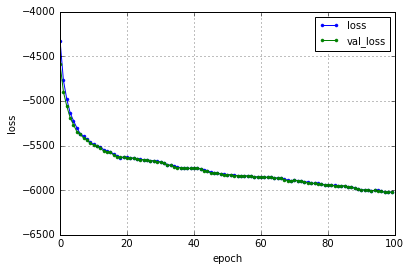

hiden node = 16
Train on 3973 samples, validate on 3973 samples
Epoch 1/100
0s - loss: 8.8486 - val_loss: -1.1577e+01
Epoch 2/100
0s - loss: -1.2819e+01 - val_loss: 7.3232
Epoch 3/100
0s - loss: -3.0702e+01 - val_loss: 0.7296
Epoch 4/100
0s - loss: -2.5720e+01 - val_loss: -1.0720e+01
Epoch 5/100
0s - loss: -3.0365e+01 - val_loss: -1.4480e+01
Epoch 6/100
0s - loss: -4.8590e+01 - val_loss: -2.5227e+01
Epoch 7/100
0s - loss: -3.4292e+01 - val_loss: -5.6601e+01
Epoch 8/100
0s - loss: -3.1747e+01 - val_loss: -2.7286e+01
Epoch 9/100
0s - loss: -5.2525e+01 - val_loss: -3.0981e+01
Epoch 10/100
0s - loss: -7.7074e+01 - val_loss: -6.6530e+01
Epoch 11/100
0s - loss: -9.0291e+01 - val_loss: -6.0364e+01
Epoch 12/100
0s - loss: -8.6054e+01 - val_loss: -1.0001e+02
Epoch 13/100
0s - loss: -6.3083e+01 - val_loss: -1.3388e+02
Epoch 14/100
0s - loss: -8.8760e+01 - val_loss: -5.8564e+01
Epoch 15/100
0s - loss: -9.0215e+01 - val_loss: -6.6214e+01
Epoch 16/100
0s - loss: -9.5084e+01 - val_loss: -9.3846e+01


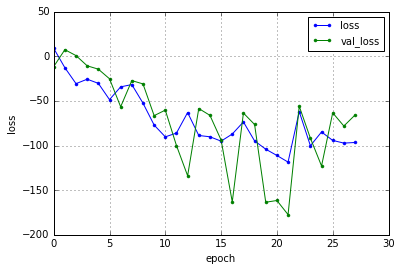

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =1983
SourceData's aborting data = 22
window shape is (1983, 1024, 3)
(1983, 1024, 3)
hiden node = 16
Train on 1983 samples, validate on 1983 samples
Epoch 1/100
0s - loss: -3.6969e+03 - val_loss: -3.9404e+03
Epoch 2/100
0s - loss: -4.0142e+03 - val_loss: -4.0789e+03
Epoch 3/100
0s - loss: -4.1205e+03 - val_loss: -4.1711e+03
Epoch 4/100
0s - loss: -4.1989e+03 - val_loss: -4.2359e+03
Epoch 5/100
0s - loss: -4.2537e+03 - val_loss: -4.2986e+03
Epoch 6/100
0s - loss: -4.3233e+03 - val_loss: -4.3576e+03
Epoch 7/100
0s - loss: -4.3860e+03 - val_loss: -4.4203e+03
Epoch 8/100
0s - loss: -4.4355e+03 - val_loss: -4.4576e+03
Epoch 9/100
0s - loss: -4.4812e+03 - val_loss: -4.5057e+03
Epoch 10/100
0s - loss: -4.5178e+03 - val_loss: -4.5355e+03
Epoch 11/100
0s - loss: -4.5525e+03 - val_loss: -4.5748e+03
Epoch 12/100
0s - loss: -4.5823e+03 - val_loss: -4.6033e+03
Epoch 13/100
0s - loss: -4.6158e

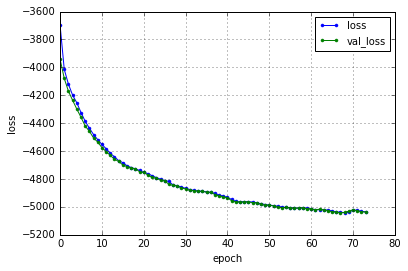

hiden node = 16
Train on 1983 samples, validate on 1983 samples
Epoch 1/100
0s - loss: -8.4566e+03 - val_loss: -9.1058e+03
Epoch 2/100
0s - loss: -9.2592e+03 - val_loss: -9.4133e+03
Epoch 3/100
0s - loss: -9.5419e+03 - val_loss: -9.6474e+03
Epoch 4/100
0s - loss: -9.7156e+03 - val_loss: -9.7941e+03
Epoch 5/100
0s - loss: -9.8487e+03 - val_loss: -9.8993e+03
Epoch 6/100
0s - loss: -9.9478e+03 - val_loss: -1.0002e+04
Epoch 7/100
0s - loss: -1.0054e+04 - val_loss: -1.0109e+04
Epoch 8/100
0s - loss: -1.0143e+04 - val_loss: -1.0190e+04
Epoch 9/100
0s - loss: -1.0248e+04 - val_loss: -1.0264e+04
Epoch 10/100
0s - loss: -1.0352e+04 - val_loss: -1.0385e+04
Epoch 11/100
0s - loss: -1.0411e+04 - val_loss: -1.0433e+04
Epoch 12/100
0s - loss: -1.0455e+04 - val_loss: -1.0472e+04
Epoch 13/100
0s - loss: -1.0497e+04 - val_loss: -1.0523e+04
Epoch 14/100
0s - loss: -1.0563e+04 - val_loss: -1.0601e+04
Epoch 15/100
0s - loss: -1.0638e+04 - val_loss: -1.0671e+04
Epoch 16/100
0s - loss: -1.0687e+04 - val_los

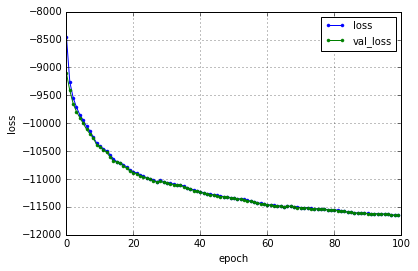

hiden node = 16
Train on 1983 samples, validate on 1983 samples
Epoch 1/100
0s - loss: 55.0804 - val_loss: 45.8572
Epoch 2/100
0s - loss: 34.2546 - val_loss: 6.9515
Epoch 3/100
0s - loss: 44.5969 - val_loss: 14.0525
Epoch 4/100
0s - loss: -2.0546e+01 - val_loss: -1.8708e+01
Epoch 5/100
0s - loss: 49.6640 - val_loss: 28.4148
Epoch 6/100
0s - loss: 10.7708 - val_loss: -5.0584e+00
Epoch 7/100
0s - loss: -2.0604e+01 - val_loss: -3.7425e+01
Epoch 8/100
0s - loss: -4.8865e+01 - val_loss: -6.1878e+01
Epoch 9/100
0s - loss: -6.8204e+01 - val_loss: -7.9989e+01
Epoch 10/100
0s - loss: -8.8570e+01 - val_loss: -9.9964e+01
Epoch 11/100
0s - loss: -1.0619e+02 - val_loss: -1.1399e+02
Epoch 12/100
0s - loss: -1.2099e+02 - val_loss: -1.2694e+02
Epoch 13/100
0s - loss: -1.3166e+02 - val_loss: -1.3876e+02
Epoch 14/100
0s - loss: -1.4027e+02 - val_loss: -1.4390e+02
Epoch 15/100
0s - loss: -1.4887e+02 - val_loss: -1.5382e+02
Epoch 16/100
0s - loss: -1.5578e+02 - val_loss: -1.5773e+02
Epoch 17/100
0s - loss

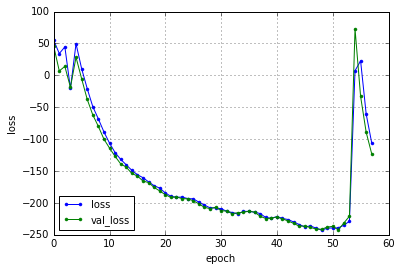

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =988
SourceData's aborting data = 22
window shape is (988, 2048, 3)
(988, 2048, 3)
hiden node = 16
Train on 988 samples, validate on 988 samples
Epoch 1/100
0s - loss: -7.2340e+03 - val_loss: -7.5836e+03
Epoch 2/100
0s - loss: -7.7103e+03 - val_loss: -7.9606e+03
Epoch 3/100
0s - loss: -8.0660e+03 - val_loss: -8.2202e+03
Epoch 4/100
0s - loss: -8.2780e+03 - val_loss: -8.3479e+03
Epoch 5/100
0s - loss: -8.3802e+03 - val_loss: -8.4343e+03
Epoch 6/100
0s - loss: -8.4591e+03 - val_loss: -8.5013e+03
Epoch 7/100
0s - loss: -8.5221e+03 - val_loss: -8.5543e+03
Epoch 8/100
0s - loss: -8.5769e+03 - val_loss: -8.6043e+03
Epoch 9/100
0s - loss: -8.6238e+03 - val_loss: -8.6563e+03
Epoch 10/100
0s - loss: -8.6711e+03 - val_loss: -8.7000e+03
Epoch 11/100
0s - loss: -8.7173e+03 - val_loss: -8.7466e+03
Epoch 12/100
0s - loss: -8.7594e+03 - val_loss: -8.7863e+03
Epoch 13/100
0s - loss: -8.7949e+03 -

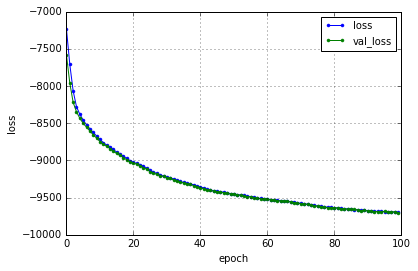

hiden node = 16
Train on 988 samples, validate on 988 samples
Epoch 1/100
0s - loss: -1.6548e+04 - val_loss: -1.7265e+04
Epoch 2/100
0s - loss: -1.7583e+04 - val_loss: -1.7996e+04
Epoch 3/100
0s - loss: -1.8170e+04 - val_loss: -1.8423e+04
Epoch 4/100
0s - loss: -1.8509e+04 - val_loss: -1.8673e+04
Epoch 5/100
0s - loss: -1.8762e+04 - val_loss: -1.8938e+04
Epoch 6/100
0s - loss: -1.9015e+04 - val_loss: -1.9161e+04
Epoch 7/100
0s - loss: -1.9225e+04 - val_loss: -1.9322e+04
Epoch 8/100
0s - loss: -1.9384e+04 - val_loss: -1.9485e+04
Epoch 9/100
0s - loss: -1.9527e+04 - val_loss: -1.9583e+04
Epoch 10/100
0s - loss: -1.9628e+04 - val_loss: -1.9703e+04
Epoch 11/100
0s - loss: -1.9735e+04 - val_loss: -1.9787e+04
Epoch 12/100
0s - loss: -1.9811e+04 - val_loss: -1.9862e+04
Epoch 13/100
0s - loss: -1.9900e+04 - val_loss: -1.9958e+04
Epoch 14/100
0s - loss: -1.9988e+04 - val_loss: -2.0049e+04
Epoch 15/100
0s - loss: -2.0101e+04 - val_loss: -2.0187e+04
Epoch 16/100
0s - loss: -2.0209e+04 - val_loss:

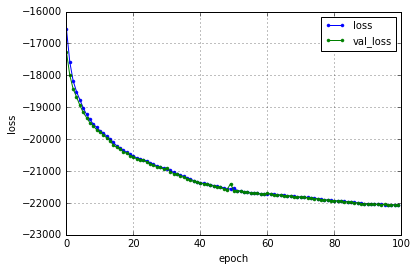

hiden node = 16
Train on 988 samples, validate on 988 samples
Epoch 1/100
0s - loss: 82.4563 - val_loss: 84.9972
Epoch 2/100
0s - loss: 72.8605 - val_loss: 110.6680
Epoch 3/100
0s - loss: 118.8569 - val_loss: 125.5333
Epoch 4/100
0s - loss: 125.6036 - val_loss: 122.2666
Epoch 5/100
0s - loss: 121.0902 - val_loss: 116.3111
Epoch 6/100
0s - loss: 113.8640 - val_loss: 109.9126
Epoch 7/100
0s - loss: 107.4632 - val_loss: 101.6999


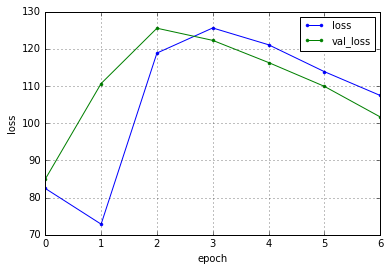

In [7]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    ArrayAxis = Axis.split(",")
    w=window.Window()
    for a in ArrayAxis:
        w.SetData(a,dic[a])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    print wind.shape
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))

    # define SaveFileName
    for AxisName,WindowNum in zip(ArrayAxis,range(3)):
            print "hiden node = "+str(encoding_dim)
            CommonName='_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap)+'-'+"l1_reg=1"+'-'+AxisName
            SaveFileNameEncord=DataName+'_encoded'+CommonName
            SaveFileNameDecord=DataName+'_decoded'+CommonName
            SaveFileNameNet=DataName+'_net'+CommonName
            SaveFileNameTrain=DataName+'_train'+CommonName
            SaveFileNameTest=DataName+'_test'+CommonName
            SaveFileNameGlaph=GlaphDataPath+DataName+CommonName+'_loss_val_loss.png'

            window_test=wind[:,:,WindowNum]
            window_train=wind[:,:,WindowNum]
            processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
            processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
            shapeNum=wind.shape[1]


            # this is our input placeholder
            input_img = Input(shape=(shapeNum,))
            # "encoded" is the encoded representation of the input
            encoded = Dense(encoding_dim, activation='tanh',
                        W_regularizer=regularizers.WeightRegularizer(l1=10e-5,l2=0.0))(input_img)
            # "decoded" is the lossy reconstruction of the input
            decoded = Dense(shapeNum, activation='linear')(encoded)

            # this model maps an input to its reconstruction
            autoencoder = Model(input=input_img, output=decoded)

            # this model maps an input to its encoded representation
            encoder = Model(input=input_img, output=encoded)

            # create a placeholder for an encoded (32-dimensional) input
            encoded_input = Input(shape=(encoding_dim,))
            # retrieve the last layer of the autoencoder model
            decoder_layer = autoencoder.layers[-1]
            # create the decoder model
            decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

            #autoencoder.compile(optimizer='adam', loss='mse')
            autoencoder.compile(optimizer='adam', loss='categorical_crossentropy')

            plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

            early_stopping = EarlyStopping(monitor='val_loss', patience=5)

            hist = autoencoder.fit(window_train, window_train,
                            nb_epoch=100,
                            verbose=2,
                            batch_size=shapeNum/8,
                            shuffle=True,
                            validation_data=(window_test, window_test)
                            ,callbacks=[early_stopping]
                                  )
            time.sleep(0.1)
            encoded_imgs = encoder.predict(window_test)
            decoded_imgs = decoder.predict(encoded_imgs)

            processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
            processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

            # save model and wights
            json_string = encoder.to_json()
            open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
            encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

            json_string = decoder.to_json()
            open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
            decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

            json_string = autoencoder.to_json()
            open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
            autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

            # plot loss
            loss = hist.history['loss']
            val_loss = hist.history['val_loss']

            nb_epoch = len(loss)
            plt.plot(range(nb_epoch), loss, marker='.', label='loss')
            plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
            plt.legend(loc='best', fontsize=10)
            plt.grid()
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.savefig(SaveFileNameGlaph)
            plt.show()

In [8]:
print "finish

SyntaxError: EOL while scanning string literal (<ipython-input-8-ff76b7c1dbed>, line 1)